<a href="https://colab.research.google.com/github/mohithingorani/Deep-Learning-Notebooks/blob/main/Krish_Naik_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

pip install tensorflow


In [2]:
import tensorflow as tf

In [3]:

print(tf.__version__)

2.18.0


In [4]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide the dataset into dependent and independent variables
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [9]:
## Feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)

gender = pd.get_dummies(X['Gender'], drop_first=True)

In [10]:
## concatenate these columns
X = X.drop(['Geography','Gender'],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X,geography,gender],axis=1)

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train  )
X_test = sc.transform(X_test)

In [16]:
X_train
X_train.shape

(8000, 11)

In [17]:
## Now lets create an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [18]:
## Lets initialize the ANN
classifier = Sequential()


In [19]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [20]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [21]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0,2))

In [22]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [23]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [25]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7907 - loss: 0.4888 - val_accuracy: 0.8198 - val_loss: 0.4300
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8357 - loss: 0.3963 - val_accuracy: 0.8357 - val_loss: 0.3813
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8655 - loss: 0.3439 - val_accuracy: 0.8463 - val_loss: 0.3681
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8567 - loss: 0.3477 - val_accuracy: 0.8501 - val_loss: 0.3690
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8557 - loss: 0.3492 - val_accuracy: 0.8497 - val_loss: 0.3659
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8638 - loss: 0.3309 - val_accuracy: 0.8504 - val_loss: 0.3574
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8638 - loss: 0.3381 - val_accuracy: 0.8516 - val_loss: 0.3755
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8668 - loss: 0.3259 

In [26]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [27]:
model_history.history['accuracy']

[0.8141444325447083,
 0.845306932926178,
 0.853517472743988,
 0.8551968932151794,
 0.8585556745529175,
 0.8602350950241089,
 0.8604217171669006,
 0.8581824898719788,
 0.8615413308143616,
 0.8606083393096924,
 0.8628475666046143,
 0.8604217171669006,
 0.8585556745529175,
 0.85780930519104,
 0.8611681461334229,
 0.858928918838501,
 0.8617279529571533,
 0.8613547086715698,
 0.8596752882003784,
 0.8622877597808838]

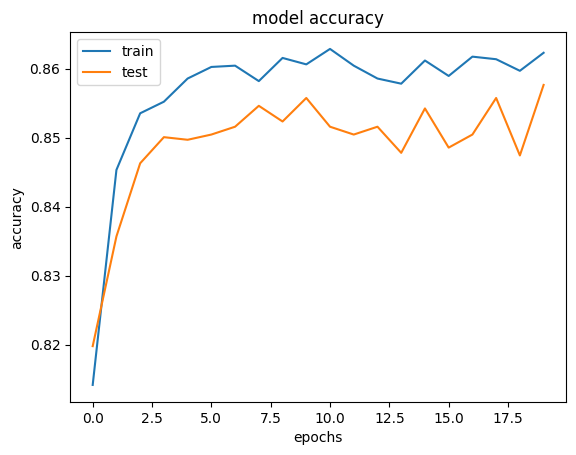

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

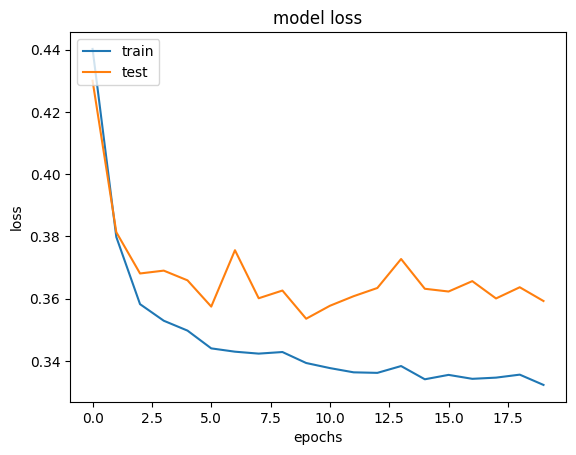

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

In [30]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[1545,   50],
       [ 222,  183]])

In [34]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [35]:
score

0.864

In [36]:
## Get the weights
classifier.get_weights()

[array([[-1.34246394e-01,  1.10632598e-01, -2.89150029e-01,
          8.93966779e-02, -1.70868456e-01,  2.49767993e-02,
         -1.23898566e-01, -1.04630083e-01, -2.40513414e-01,
          1.67997882e-01,  2.19486758e-01],
        [-2.00478292e+00,  8.93086731e-01,  7.55176544e-01,
         -1.05156195e+00, -2.54352617e+00, -1.27117288e+00,
          2.11863685e+00,  2.46569321e-01, -1.95632911e+00,
         -2.19718957e+00, -2.22285080e+00],
        [ 5.23759246e-01,  2.55148765e-02, -3.03985924e-01,
          1.02968991e+00, -2.51206934e-01,  2.49667108e-01,
         -7.94216618e-02, -3.20968121e-01, -5.55344403e-01,
          2.81280071e-01, -5.69385231e-01],
        [-1.33432162e+00, -2.05387163e+00,  1.42010236e+00,
          7.89642572e-01, -2.99369961e-01, -7.07055986e-01,
         -3.81092876e-01, -1.38473570e+00,  8.00591409e-02,
         -3.39632660e-01,  3.74630168e-02],
        [ 8.46890882e-02,  4.74233180e-01,  2.18181038e+00,
         -2.49570519e-01,  5.16792178e-01, -